<a href="https://colab.research.google.com/github/mehark56/flightnetworkanalysis/blob/main/FlightNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
import networkx as nx
G = nx.MultiDiGraph()

Read CSV File

In [85]:
my_dataset = pd.read_csv('airlinedelaycauses_DelayedFlights.csv',  low_memory=False)

Print Dataset

In [86]:
my_dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764358,2505442,2008,5,23,5,1422.0,1400,1748.0,1732,XE,...,4.0,14.0,0.0,N,0.0,0.0,0.0,0.0,0.0,16.0
764359,2505444,2008,5,26,1,1931.0,1720,2116.0,1942,XE,...,5.0,13.0,0.0,N,0.0,0.0,0.0,5.0,0.0,89.0
764360,2505445,2008,5,15,4,1116.0,1110,1254.0,1237,XE,...,5.0,31.0,0.0,N,0.0,6.0,0.0,11.0,0.0,0.0
764361,2505456,2008,5,28,3,2129.0,2100,2310.0,2232,XE,...,6.0,24.0,0.0,N,0.0,0.0,0.0,9.0,0.0,29.0


DATA PREPROCESSING

Column Removal

In [87]:
my_dataset = my_dataset.drop(['Year','Month','DayofMonth','CRSDepTime','CRSArrTime','CRSElapsedTime','ArrDelay','DepDelay','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','TaxiIn','TaxiOut','DayOfWeek'],axis=1)


In [88]:
my_dataset

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
0,0,2003.0,2211.0,WN,335,N712SW,128.0,116.0,IAD,TPA,810
1,1,754.0,1002.0,WN,3231,N772SW,128.0,113.0,IAD,TPA,810
2,2,628.0,804.0,WN,448,N428WN,96.0,76.0,IND,BWI,515
3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,IND,BWI,515
4,5,1940.0,2121.0,WN,378,N726SW,101.0,87.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...
764358,2505442,1422.0,1748.0,XE,3048,N16571,146.0,128.0,IAH,CLT,913
764359,2505444,1931.0,2116.0,XE,2737,N17984,105.0,87.0,GSP,EWR,594
764360,2505445,1116.0,1254.0,XE,2845,N15941,98.0,62.0,IAH,TUL,429
764361,2505456,2129.0,2310.0,XE,2048,N15932,101.0,71.0,IAH,MEM,469


Drop Null Value Rows

In [89]:
my_dataset = my_dataset.dropna()
#thresh=half_count,
my_dataset

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
0,0,2003.0,2211.0,WN,335,N712SW,128.0,116.0,IAD,TPA,810
1,1,754.0,1002.0,WN,3231,N772SW,128.0,113.0,IAD,TPA,810
2,2,628.0,804.0,WN,448,N428WN,96.0,76.0,IND,BWI,515
3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,IND,BWI,515
4,5,1940.0,2121.0,WN,378,N726SW,101.0,87.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...
764358,2505442,1422.0,1748.0,XE,3048,N16571,146.0,128.0,IAH,CLT,913
764359,2505444,1931.0,2116.0,XE,2737,N17984,105.0,87.0,GSP,EWR,594
764360,2505445,1116.0,1254.0,XE,2845,N15941,98.0,62.0,IAH,TUL,429
764361,2505456,2129.0,2310.0,XE,2048,N15932,101.0,71.0,IAH,MEM,469


Store Unique Airports Names In A List

In [90]:
import pandas as pd # Import the pandas library

uniqueValues = pd.concat([my_dataset['Origin'], my_dataset['Dest']]).unique()
print(uniqueValues)

['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' 'MDT' 'MFR' 'OGG' 'PSP' 'RAP' 'ROA' 'SBA' 'SBN' 'SPI' 'TEX' 'YUM'
 'AVP' 'CWA' 'DRO' 'ILM' 'ITO' 'JFK' 'TVC' 'HDN' 'S

In [91]:
print(type(uniqueValues))

<class 'numpy.ndarray'>


In [92]:
import pickle
with open('airport.pkl', 'wb') as m:
    pickle.dump(uniqueValues, m)

Declaring Node For Each Airport In The List

In [93]:
for airport in uniqueValues:
    G.add_node(airport, name=airport)

Total No Of Nodes/Airports

In [94]:
G.number_of_nodes()

291

Graphical Representation Of Nodes

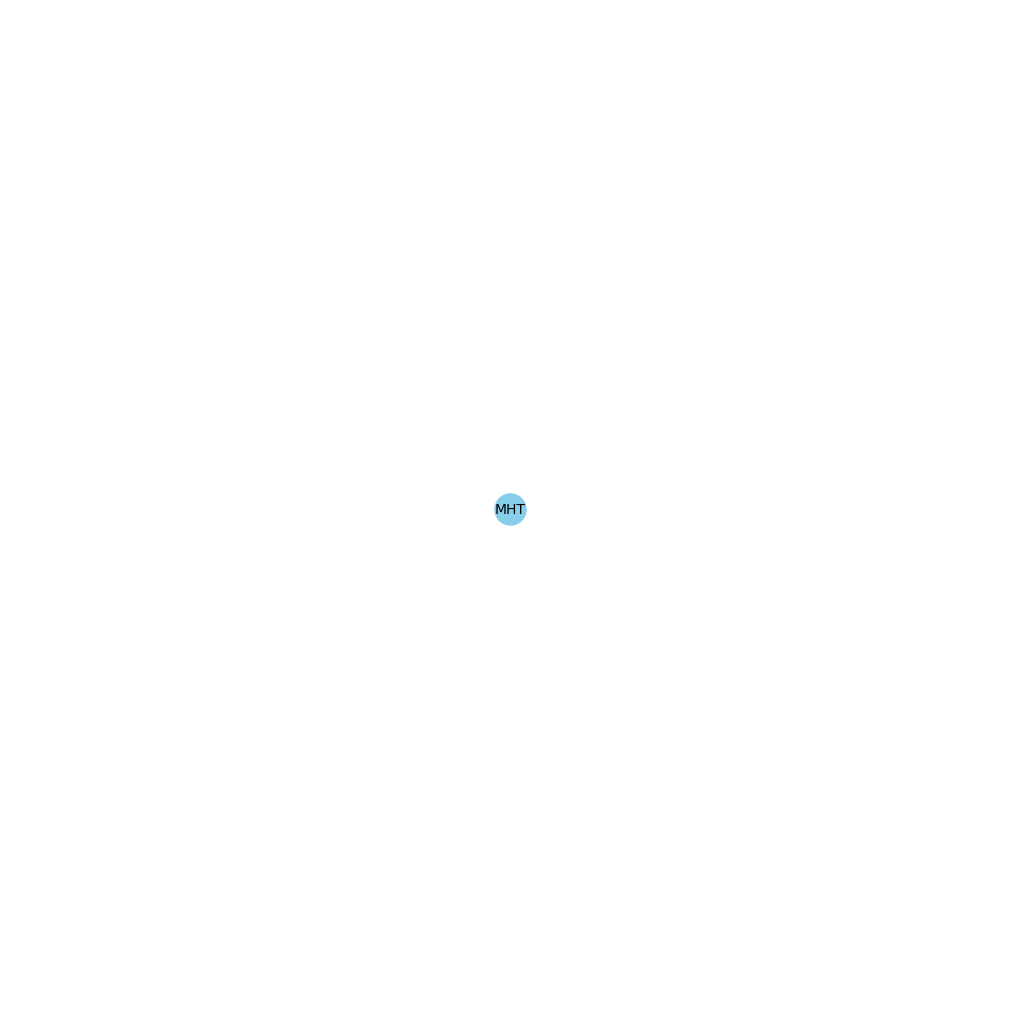

In [95]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your original graph

# Specify the airport code of interest
target_airport = 'MHT'  # Replace 'ATL' with your desired airport code

# Get the neighbors of the target airport
neighbors = list(G.neighbors(target_airport))

# Include the target airport itself in the list of nodes to visualize
nodes_to_draw = neighbors + [target_airport]

# Create a subgraph with just these nodes
subgraph = G.subgraph(nodes_to_draw)

# Draw the subgraph
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
nx.draw(subgraph, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
plt.show()


Making Edges Between The Airports With Weights As Min Time

In [ ]:
for flight in my_dataset.index:
    # print (my_dataset['FlightNum'][train])
    # G.add_edge(my_dataset['Origin'], my_dataset['Dest'], weight=my_dataset['ActualElapsedTime'])
    # G.add_edge(my_dataset['Origin'][train], my_dataset['Dest'][train], l=my_dataset['ActualElapsedTime'][train],flight=my_dataset['FlightNum'][train])

    if not G.has_edge(my_dataset['Origin'][flight], my_dataset['Dest'][flight]):
        G.add_edge(my_dataset['Origin'][flight], my_dataset['Dest'][flight], l=my_dataset['ActualElapsedTime'][flight],flight=my_dataset['FlightNum'][flight])
    elif G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["l"] > my_dataset['ActualElapsedTime'][flight]:
        G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["l"] = my_dataset['ActualElapsedTime'][flight]
        G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["flight"] = my_dataset['FlightNum'][flight]



# import networkx as nx
# G = nx.MultiDiGraph()
# G.add_edge("A", "B", weight=3)
# G.add_edge("A", "C", weight=10)
# G.edges(data=True)
# check if edge exists


# if G.has_edge("A", "B") and G["A"]["B"][0]["weight"] > 5:
#     G["A"]["B"][0]["weight"] = 5
# elif not G.has_edge("A", "B"):
#     G.add_edge("A", "B", weight=5)
    # continue
# nx.shortest_path(G, "A", "B", weight="weight")
# G.edges(data=True)

In [ ]:
G.number_of_edges()

In [ ]:
G.number_of_nodes()

Graphical Representation

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Use spring_layout with increased 'k' to spread nodes out
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Increase figure size for better visibility
plt.figure(figsize=(20, 20))

# Draw the graph with labels and adjust node size and font size
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, edge_color='gray', node_color='blue')

plt.show()


In [ ]:
G.number_of_edges()

Centrality Measures For Each Nodes

Degree Centrality (DC)

In [ ]:
nx.degree_centrality(G)

Betweenness Centrality

In [ ]:
nx.betweenness_centrality(G)

Top 10 Airports With Highest Degree

In [ ]:
l=list(G.degree(list(G.nodes())))
l.sort(key=lambda x: x[1], reverse=True)

In [ ]:

l[:10] #top 10 nodes with highest degree (stations with most number of flights)

**Flight**

In [ ]:
G.edges('ATL')

In [ ]:
G.degree('ATL')

In [ ]:
for i in uniqueValues:
    print(i)

Airport With Their Degrees

In [ ]:
dict={}
for i in uniqueValues:
    dict[i]=G.degree(i)
dict

In [ ]:
df =pd.DataFrame(nx.adjacency_matrix(G, weight="l").todense(), index=G.nodes(), columns=G.nodes())
df

Saving Shorted Distance Matrix

In [ ]:
import pickle
dbfile = open('df', 'ab')
pickle.dump(df, dbfile)
dbfile.close()

# dbfile = open('examplePickle', 'rb')
# G = pickle.load(dbfile)
# dbfile.close()

In [ ]:
dbfile = open('df', 'rb')
df2 = pickle.load(dbfile)
dbfile.close()

In [ ]:
df2

In [ ]:
o=nx.shortest_path_length(G, source="ATL", target="IND", weight="l")
o

In [ ]:
shortestPathByDistanceTimeDF =pd.DataFrame( index=G.nodes(), columns=G.nodes())
for i in G.nodes():
    for j in G.nodes():
        if i==j:
            continue
        lst=[]
        # try:
        #     lst.append(nx.shortest_path_length(G, source=i, target=j, weight="distance"))
        # except nx.NetworkXNoPath:
        #     lst.append(None)
        try:
            lst.append(nx.shortest_path_length(G, source=i, target=j, weight="l"))
        except nx.NetworkXNoPath:
            lst.append(None)

        shortestPathByDistanceTimeDF.loc[i,j] = lst

SHORTEST PATH DISTANCE

In [ ]:
shortestPathByDistanceTimeDF

SHORTEST PATH

In [ ]:
import networkx as nx

# Check if the nodes exist in the graph, considering case sensitivity
source_node = "lmt"
target_node = "pir"

# Check if both source and target nodes are in the graph
if source_node in G.nodes() and target_node in G.nodes():
    try:
        # Calculate the shortest path using lowercase node names
        p = nx.shortest_path(G, source=source_node, target=target_node, weight="l")
        print(f"The shortest path from {source_node} to {target_node} is: {p}")
    except nx.NetworkXNoPath:
        print(f"No path exists between {source_node} and {target_node}.")
    except nx.NodeNotFound as e:
        print(f"NodeNotFound error: {e}")
else:
    missing_nodes = [node for node in [source_node, target_node] if node not in G.nodes()]
    print(f"Node(s) not found in the graph: {', '.join(missing_nodes)}")


In [ ]:
import pickle
with open('graph.pkl', 'wb') as m:
    pickle.dump(G, m)

In [ ]:
n = 20
k = 4
p = 0.3
seed = 42

G8 = nx.watts_strogatz_graph(n, k, p, seed=seed)

# Draw the graph using the default layout
nx.draw(G8, with_labels=True)

In [ ]:
nodes = [1, 2, 3, 4, 5]
# Create a subgraph from the selected nodes
subgraph = G.subgraph(nodes)

# Draw the original graph and the subgraph side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

nx.draw(G, ax=ax1, with_labels=True)
ax1.set_title('Original Graph')

nx.draw(subgraph, ax=ax2, with_labels=True)
ax2.set_title('Subgraph')

plt.show()

In [ ]:
import networkx as nx
G_simple = nx.Graph(G)

# Find the cycle basis of the graph
cycle_basis = nx.cycle_basis(G_simple, root="ATL")

# Print the cycle basis
print(len(cycle_basis))

In [ ]:
G0 = nx.Graph(G)
efficiency = nx.efficiency(G0, "ATL", "YUM")

# Print the efficiency
print(efficiency)

In [ ]:
#CSV To Dataframe
import pandas as pd
station_code = pd.read_csv('US-Airport-Codes.csv',  low_memory=False)
station_code

In [ ]:
import csv
airport_name={}
with open ('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    airport_name={rows[1].strip():rows[0].strip() for rows in data}
print(type(airport_name))

In [ ]:
print(airport_name)

In [ ]:
import pickle
with open('airport_code.pkl', 'wb') as f:
    pickle.dump(airport_name, f)

In [ ]:
import csv

airport_name = {}
with open('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    # Skip the header row
    next(data)
    airport_name = {rows[1].strip(): rows[0].strip() for rows in data}

print(airport_name['ATL'])  # Access without trailing space

In [ ]:
option1='Atlanta Hartsfield International Airport'
option2='Indianapolis International Airport'
# p = nx.shortest_path(G,source=[i for i in airport_name if airport_name[i]==option1][0],target=[i for i in airport_name if airport_name[i]==option2][0], weight="l")
p=nx.shortest_path(G,source='ATL',target='IND',weight="l")
print(p)
source=[i for i in airport_name if airport_name[i]=="Atlanta Hartsfield International Airport "]
target=[i for i in airport_name if airport_name[i]=="Indianapolis International Airport "]
print(source)
print(target)

In [ ]:
#Remove Spaces from Airport Codes
# for i in airport_name:

#     airport_name[i]=airport_name[i].strip()
# print(airport_name)
#Remove Spaces from Airport Codes
# for i in airport_name:
#     #Remove Spaces from Airport Codes keys
#     airport_name[i.strip()]=airport_name[i]
# print(airport_name)
print(airport_name['ATL']) # Remove trailing space from key
for i in airport_name:
    #Remove Spaces from Airport Codes keys
    airport_name[i.strip()]=airport_name[i]
print(airport_name)


In [ ]:
import csv
airport_name={}
with open ('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    state_name={rows[1].strip():rows[2].strip() for rows in data}
print(state_name)

In [ ]:
import pickle
with open('state_code.pkl', 'wb') as f:
    pickle.dump(state_name, f)

In [ ]:
state_name.values()

In [ ]:
#Degree Of Particular Node
G.degree('ATL')

In [ ]:
temp={}
for z in state_name:
    if state_name[z]=='Alabama':
        temp[z]=G.degree(z)
temp

In [ ]:
#Store Unique States
uniqueValues = set(state_name.values())
type(uniqueValues)
type(list(uniqueValues))

In [ ]:
with open('graph.pkl', 'rb') as c:
    nod = pickle.load(c)

In [ ]:
!pip install streamlit
import streamlit as st

temp={}
for z in state_name:
    if state_name[z]=='Alabama':
        temp[z]=nod.degree(z)
temp
st.write(temp) # Use st.write to display the dictionary in streamlit
# Put Dictionary in Dataframe
df = pd.DataFrame.from_dict(temp, orient='index', columns=['Degree'])
# Print table
st.write(df) # Use st.write to display the DataFrame in streamlit

In [ ]:
import csv
airport_name={}
with open ('US-STATE.csv', mode='r') as f:
    data = csv.reader(f)
    state_name2={rows[1].strip():rows[0].strip() for rows in data}
print(state_name2)

In [ ]:
import pickle
with open('state_name2.pkl', 'wb') as f:
    pickle.dump(state_name2, f)

In [ ]:
list(state_name2.values())

In [ ]:
state_name2

In [ ]:
import pickle
with open('nearairport.pkl', 'wb') as m:
    pickle.dump(shortestPathByDistanceTimeDF, m)

In [ ]:
print(type(shortestPathByDistanceTimeDF))

In [ ]:
shortestPathByDistanceTimeDF

In [ ]:
import pandas as pd

# Convert all values in the series to numeric, forcing errors to NaN
series = pd.to_numeric(shortestPathByDistanceTimeDF['ATL'], errors='coerce')

# Drop NaN values
n = series.dropna().sort_values().head(100)

# Convert series to dictionary
n_dict = n.to_dict()

# Convert all float values in the dictionary to int
blank = {}
for key, value in n_dict.items():
    if pd.notna(value):  # Check if value is not NaN
        blank[key] = int(value)
    else:
        blank[key] = None

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(blank, orient='index', columns=['Distance'])

print(df)
